# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [3]:
#your code here
spaceship.dropna(inplace=True)
spaceship.Cabin= spaceship.Cabin.str[0]

spaceship_enc = spaceship.copy()
spaceship_transformed = pd.get_dummies(spaceship_enc[['HomePlanet','Cabin','Destination']],drop_first=True)
spaceship_transformed.head(3)

spaceship_transformed = pd.merge(left=spaceship_enc,
                                right=pd.get_dummies(spaceship_enc[['HomePlanet','Cabin','Destination']],prefix=['HomePlanet','Cabin','Destination'],drop_first=True),
                                left_index=True,
                                right_index=True)

features = spaceship_transformed.drop(columns=["PassengerId","Name","Transported","HomePlanet","Cabin","Destination"])
target = spaceship_transformed["Transported"]

selected_features = features.drop(columns=["ShoppingMall","HomePlanet_Mars","Cabin_F","Cabin_G","Cabin_T","Destination_PSO J318.5-22"])
target=target.astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.20, random_state=0)
normalizer = MinMaxScaler()
normalizer.fit(X_train) 

X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
import seaborn as sns

## Bagging without pasting

In [7]:
#your code here
bagging_cla = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                                n_estimators=100,
                                max_samples = 1000,
                                random_state=0)
bagging_cla.fit(X_train_norm, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100, random_state=0)

In [8]:
pred_bag = bagging_cla.predict(X_test_norm)

<Axes: >

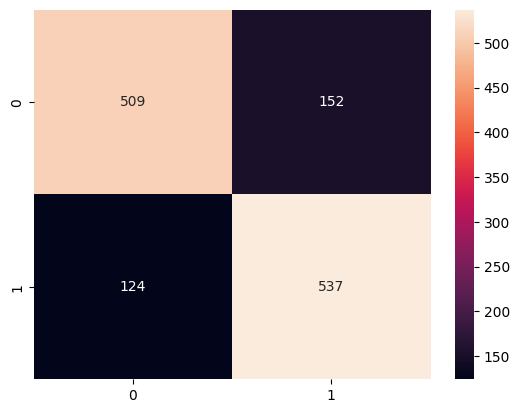

In [9]:
sns.heatmap(confusion_matrix(y_test, pred_bag), annot=True,fmt='g')

In [10]:
print(classification_report(y_test, pred_bag))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       661
           1       0.78      0.81      0.80       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



## Bagging with pasting

In [11]:
bagging_cla2 = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                                n_estimators=100,
                                max_samples = 1000,
                                bootstrap=False,
                                random_state=0)  # with pasting
bagging_cla2.fit(X_train_norm, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100, random_state=0)

In [12]:
pred_bag2 = bagging_cla.predict(X_test_norm)

In [13]:
print(classification_report(y_test, pred_bag2))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       661
           1       0.78      0.81      0.80       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



<Axes: >

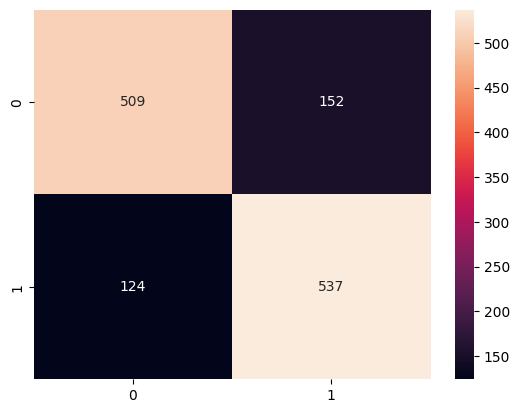

In [14]:
sns.heatmap(confusion_matrix(y_test, pred_bag2), annot=True,fmt='g')

## Gradient Boosting

In [15]:
gb_cla = GradientBoostingClassifier(max_depth=20,
                                    n_estimators=100,
                                    random_state=0)
gb_cla.fit(X_train_norm, y_train)

GradientBoostingClassifier(max_depth=20, random_state=0)

In [16]:
pred_gb = gb_cla.predict(X_test_norm)

In [17]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       661
           1       0.75      0.81      0.78       661

    accuracy                           0.77      1322
   macro avg       0.77      0.77      0.77      1322
weighted avg       0.77      0.77      0.77      1322



<Axes: >

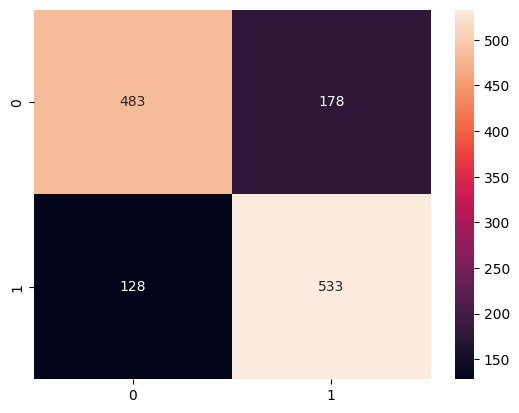

In [18]:
sns.heatmap(confusion_matrix(y_test, pred_gb), annot=True,fmt='g')

- Evaluate your model

In [19]:
# we concern about the "Transported" --> increase precision; more TP, less FP
# We choose Bagging to continue. (with the highest score on precision of class "1" : 0.77)

**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

### Grid Search

In [20]:
grid = {"n_estimators": [50, 100, 500],
        'max_samples': [0.5, 0.7, 1.0],
        "estimator__max_depth":[10]}
        # 'bootstrap': [True, False] True for bagging, False for pasting

In [21]:
from sklearn.model_selection import ParameterGrid

In [22]:
ParameterGrid(grid)

- Run Grid Search

In [23]:
bag_cla = BaggingClassifier(DecisionTreeClassifier())  #--> our base estimator is DecisionTree

In [24]:
model = GridSearchCV(estimator = bag_cla, param_grid = grid, cv=5)

In [25]:
model.fit(X_train_norm, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'estimator__max_depth': [10],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [26]:
model.best_params_

{'estimator__max_depth': 10, 'max_samples': 0.7, 'n_estimators': 500}

In [27]:
best_model = model.best_estimator_

- Evaluate your model

In [28]:
pred = best_model.predict(X_test_norm)

print(classification_report(y_test, pred))

# precision of class "0": 0.80->0.81
# precision of class "1": 0.78->0.77

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       661
           1       0.77      0.82      0.79       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



<Axes: >

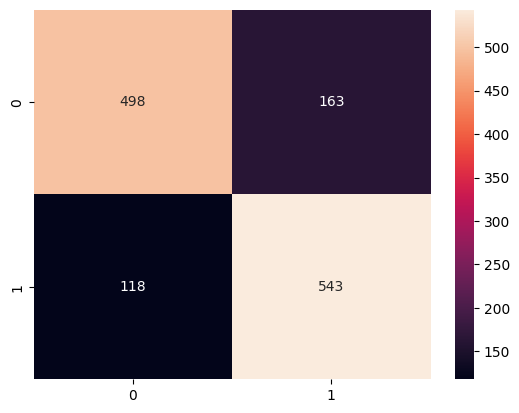

In [29]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True,fmt='g')

### Random Search

In [30]:
grid2 = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        'max_samples':np.linspace(start=0.5, stop=1.0, num=5),  # max_samples --> float, no need to be converted into int
        "estimator__max_depth":[int(x) for x in np.linspace(10, 110, num = 11)]}

In [31]:
bag_cla2 = BaggingClassifier(DecisionTreeClassifier())

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
model2 = RandomizedSearchCV(estimator = bag_cla2, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [34]:
model2.fit(X_train_norm,y_train)

c:\Users\54189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10],
                                        'max_samples': [0.5, 0.7, 1.0],
                                        'n_estimators': [50, 100, 500]})

In [35]:
model2.best_params_

{'n_estimators': 500, 'max_samples': 0.7, 'estimator__max_depth': 10}

In [36]:
best_model2 = model2.best_estimator_

In [37]:
# evaluate model
pred2 = best_model2.predict(X_test_norm)

print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       661
           1       0.77      0.82      0.80       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



<Axes: >

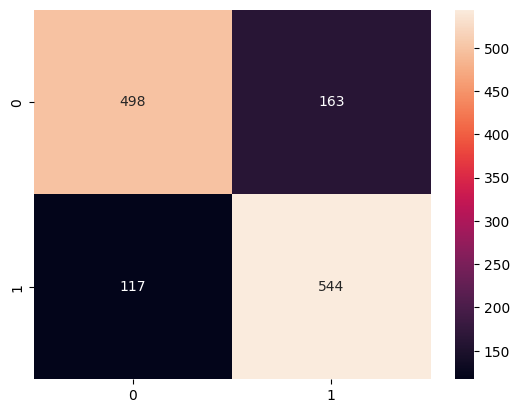

In [38]:
sns.heatmap(confusion_matrix(y_test, pred2), annot=True,fmt='g')